## **1. Khai báo thư viện cần sử dụng:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# **2. Kết nối với Google Drive để đọc và lưu dữ liệu:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **3. Khai báo đường dẫn thư mục Train, Validation chứa ảnh dữ liệu:**

In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/AI/Nhận diện động vật/Train"
valid_image_files_path = "/content/drive/MyDrive/AI/Nhận diện động vật/Validation"

# **4. Gán nhãn dữ liệu:**

In [ ]:
label=['Bướm','Cá bảy màu','Cào cào','Chó','Chuồn chuồn','Cóc','Gà','Mèo','Sóc đất','Thằn lằn']

# **5. Tiền xử lý dữ liệu ảnh với ImageDataGenerator:**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

# **6. Đọc dữ liệu Train và Validation:**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(200, 200),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),               
    class_mode='categorical')

Found 700 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


# **7. Xây dựng mô hình:**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# Lớp CNN 1:
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# Lớp CNN 2:
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Lớp CNN 3:
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  

# Chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều:
model.add(Flatten()) 
# Lớp ẩn:
model.add(Dense(512, activation=tf.nn.relu))
# Lớp output:
model.add(Dense(10, activation=tf.nn.softmax)) # 4 đầu ra. 

# **8. Thiết lập các tham số để huấn luyện mô hình:**




In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

# **9. Huấn luyện mô hình:**

In [ ]:
EPOCHS=100  
history=model.fit(
    train_generator,
    steps_per_epoch=3,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=3)

Epoch 1/100
3/3 [==============================] - 83s 34s/step - loss: 5.6479 - acc: 0.1146 - val_loss: 3.4894 - val_acc: 0.1042
Epoch 2/100
3/3 [==============================] - 54s 22s/step - loss: 2.6549 - acc: 0.1042 - val_loss: 2.2807 - val_acc: 0.2812
Epoch 3/100
3/3 [==============================] - 43s 16s/step - loss: 2.2205 - acc: 0.2188 - val_loss: 2.1929 - val_acc: 0.1979
Epoch 4/100
3/3 [==============================] - 37s 14s/step - loss: 2.1180 - acc: 0.1771 - val_loss: 2.1112 - val_acc: 0.3021
Epoch 5/100
3/3 [==============================] - 35s 12s/step - loss: 1.9651 - acc: 0.3958 - val_loss: 1.9483 - val_acc: 0.3854
Epoch 6/100
3/3 [==============================] - 33s 13s/step - loss: 1.7900 - acc: 0.4583 - val_loss: 1.9923 - val_acc: 0.4167
Epoch 7/100
3/3 [==============================] - 34s 12s/step - loss: 1.8408 - acc: 0.3125 - val_loss: 1.7930 - val_acc: 0.4167
Epoch 8/100
3/3 [==============================] - 31s 12s/step - loss: 1.6594 - acc: 0.45

## **10. Sử dụng mô hình dự đoán:**

Saving Thanlan (9).jpg to Thanlan (9).jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Đây là con:   Thằn lằn


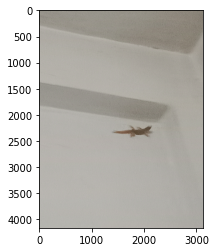

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  #In ảnh đọc được:
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Đây là con:  ', label[np.argmax(y_predict)])